In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [7]:
import datetime
nasa = pd.read_csv("C:\PythonScripts/course-files/nasa_facebook_statuses.csv",usecols=["status_published","num_reactions",
"num_comments","num_shares","num_likes"])
nasa.head()

,status_published,num_reactions,num_comments,num_shares,num_likes
0,2016-06-24 08:32:58,5406,50,170,5142
1,2016-06-23 19:19:16,20552,240,1428,19074
2,2016-06-23 18:07:03,7827,59,426,7551
3,2016-06-23 13:35:02,26118,442,3604,24359
4,2016-06-23 12:02:08,2886,97,0,2731


In [8]:
nasa["status_published"] = pd.to_datetime(nasa["status_published"])

filter =(nasa['status_published'] >= '2016-3-1') & (nasa['status_published'] < '2016-6-1')
nasa = nasa[filter]
nasa.head()

,status_published,num_reactions,num_comments,num_shares,num_likes
137,2016-05-31 20:37:02,3003,339,412,2840
138,2016-05-31 19:43:18,29975,259,2620,28646
139,2016-05-31 18:04:59,10998,158,1379,10221
140,2016-05-31 16:31:30,21482,142,1088,20555
141,2016-05-31 15:11:02,958,26,94,914


In [9]:
nasa['day'] = nasa.apply(lambda row: row["status_published"].day, axis=1)

nasa_by_day = nasa.groupby(by='day').sum()
nasa_by_day.head()

,num_reactions,num_comments,num_shares,num_likes
day,,,,
1,288880,4727,31688,273613
2,740863,11284,86792,704247
3,197194,4021,42645,184177
4,272024,3815,34199,259349
5,263870,3127,19295,254282


<AxesSubplot:xlabel='day'>

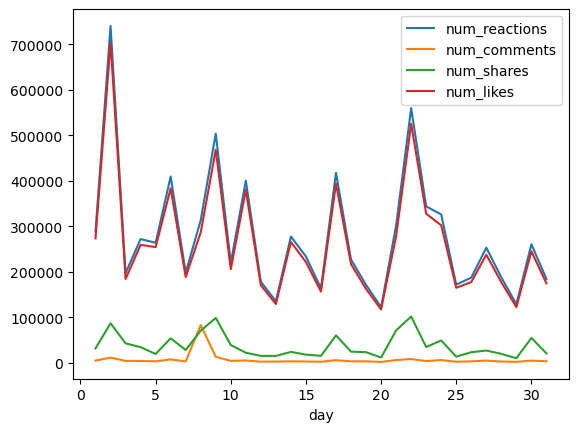

In [3]:
nasa_by_day.plot()

<AxesSubplot:xlabel='day'>

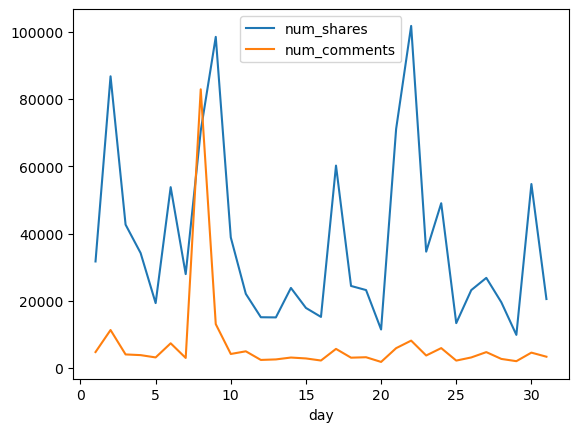

In [4]:
nasa_by_day[['num_shares','num_comments']].plot()

<AxesSubplot:title={'center':'NASA Facebook activity'}, xlabel='day'>

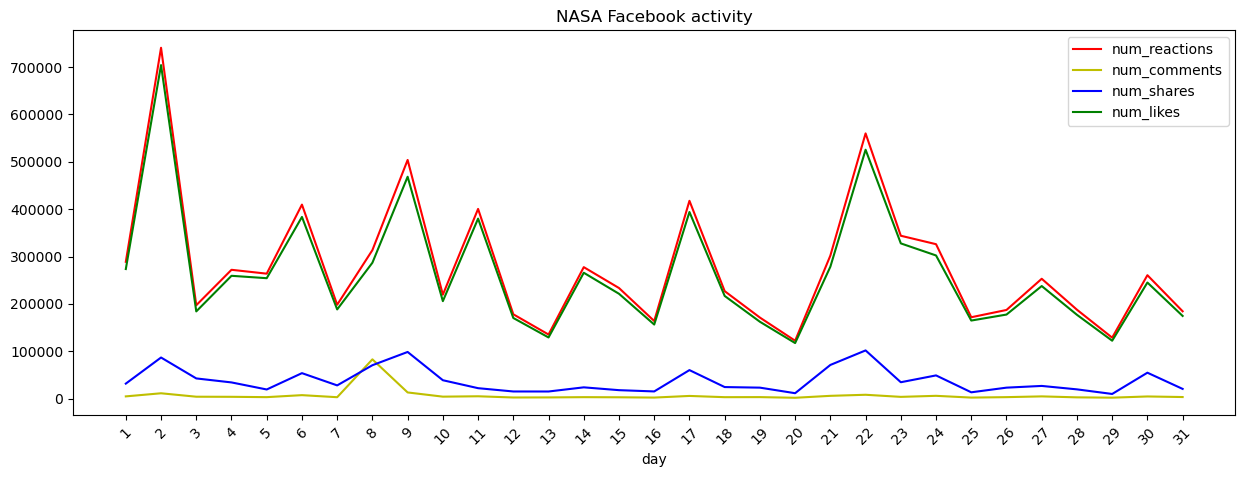

In [6]:
nasa_by_day.plot(figsize=(15,5),title='NASA Facebook activity',color=['r','y','b','g'],xticks=range(1,32),rot=45)

In [10]:
nasa['month'] = nasa.apply(lambda row: row["status_published"].month, axis=1)

nasa_by_month = nasa.groupby(by='month').sum()
nasa_by_month.head()

,num_reactions,num_comments,num_shares,num_likes,day
month,,,,,
3,3003815,49108,392585,2846361,2871
4,2927616,120118,370803,2760385,2968
5,2708977,46122,393576,2548960,3252


<AxesSubplot:title={'center':'NASA Facebook activity'}, ylabel='num_likes'>

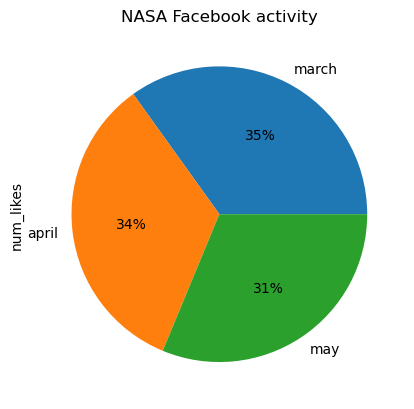

In [11]:
nasa_by_month['num_likes'].plot(kind='pie',title='NASA Facebook activity',labels=['march','april','may'],autopct='%.0f%%')